# Numerical solution of differential equation systems

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
a = 1
b = 2

def f(t, u):
    return [u[1], -t * u[1] - (t ** 2 - 2) / t ** 2 * u[0]]

u_0 = [1, -1]

def u(t):
    return 1 / t

In [41]:
h = 0.2
h_2 = 0.1

N = int((b - a) / h)
t = [a + h * i for i in range(N + 1)]
N_2 = int((b - a) / h_2)
t_2 = [a + h_2 * i for i in range(N_2 + 1)]

### Runge-Kutta method

In [42]:
def rk_method(N, h, t, C, a, b, s, n_var):
    y = [u_0]
    for i in range(1, N + 1):
        K = []
        for j in range(s):
            K.append(f(t[i - 1] + C[j] * h, [y[i - 1][p] + h * sum([a[j][k] * K[k][p] for k in range(j)]) for p in range(n_var)]))
        y.append(y[i - 1] + h * np.dot(np.array(b), np.array(K)))
    return [y_i[0] for y_i in y]

In [43]:
y = rk_method(N, h, t, C=[0, 1, 1/2], a=[[0, 0, 0], [1, 0, 0], [1/4, 1/4, 0]], b=[1/6, 1/6, 2/3], s=3, n_var=2)

In [44]:
y_2 = rk_method(N_2, h_2, t_2, C=[0, 1, 1/2], a=[[0, 0, 0], [1, 0, 0], [1/4, 1/4, 0]], b=[1/6, 1/6, 2/3], s=3, n_var=2)

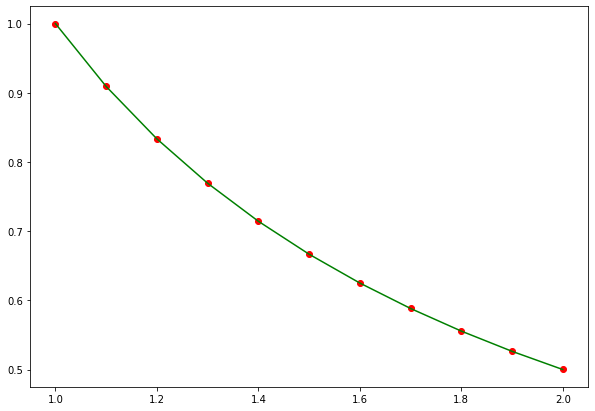

In [45]:
u_lst = [u(i) for i in t_2]
plt.figure(figsize=(10, 7))
plt.plot(t_2, u_lst, c='g')
plt.scatter(t_2, y_2, c='r')
plt.show()

In [46]:
print(np.linalg.norm([u_lst[i] - y_2[i] for i in range(N_2)], np.inf))

3.488948996821506e-05


In [47]:
m = 3
y_2_comp = y_2[::2]
print(np.linalg.norm([y[i] - y_2_comp[i] for i in range(N + 1)], np.inf) / (2 ** m - 1))

2.5900749475124156e-05
